In [4]:
from zipfile import ZipFile
import numpy as np

In [5]:
import pandas as pd
import zipfile
import re

zf = zipfile.ZipFile('Data_incidents.csv.zip') 
data = pd.read_csv('Data_incidents.csv.zip').reset_index()

/Users/Anna/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.head(1)

,index,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,...,Officer Involved Shooting - Bystander killed,Child injured,Gun buy back action,Terrorism Involvement,Officer Involved Shooting - Accidental discharge - no injury required,Mistaken ID,Officer Involved Shooting - subject/suspect/perpetrator suicide by cop,Ghost gun,Political Violence,NAV
0,0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,...,False,False,False,False,False,False,False,False,False,False


## Extract the dummy columns from the rest of the dataset

In [7]:
for col in data.columns: 
    print(col) 

index
Unnamed: 0
incident_id
date
state
city_or_county
address
n_killed
n_injured
incident_url
source_url
incident_url_fields_missing
congressional_district
gun_stolen
gun_type
incident_characteristics
latitude
location_description
longitude
n_guns_involved
notes
participant_age
participant_age_group
participant_gender
participant_name
participant_relationship
participant_status
participant_type
sources
state_house_district
state_senate_district
Shot - Wounded/Injured
Mass Shooting
Possession
Possession of gun by felon or prohibited person
Shot - Dead
Gang involvement
Shots Fired - No Injuries
Bar/club incident - in or around establishment
Officer Involved Incident
Officer Involved Shooting - subject/suspect/perpetrator killed
Drug involvement
Kidnapping/abductions/hostage
Under the influence of alcohol or drugs
Suicide
Murder/Suicide
Attempted Murder/Suicide
Domestic Violence
Home Invasion
Home Invasion - Resident killed
Armed robbery with injury/death and/or evidence of DGU found
Dri

In [8]:
start = data.columns.get_loc("Shot - Wounded/Injured") # first column of interest
end = data.columns.get_loc("Political Violence") +1# last column of interest

characters = data.iloc[:,start:end].reset_index()

## Find all unique combinations and number of times they occur together

In [9]:
from itertools import combinations
characters = characters.set_index('index')

comb = list(combinations(characters.columns,2)) # a list of all the column headers
df_comb = pd.concat([characters[c[1]].add(characters[c[0]]) for c in comb], axis=1, keys=comb) # combinations all heaters and the their occurances together
df_comb.columns = df_comb.columns.map('||'.join) #make double-header into one header combines by "||"

In [12]:
df_comb.describe()

,Shot - Wounded/Injured||Mass Shooting,Shot - Wounded/Injured||Possession,Shot - Wounded/Injured||Possession of gun by felon or prohibited person,Shot - Wounded/Injured||Shot - Dead,Shot - Wounded/Injured||Gang involvement,Shot - Wounded/Injured||Shots Fired - No Injuries,Shot - Wounded/Injured||Bar/club incident - in or around establishment,Shot - Wounded/Injured||Officer Involved Incident,Shot - Wounded/Injured||Officer Involved Shooting - subject/suspect/perpetrator killed,Shot - Wounded/Injured||Drug involvement,...,Officer Involved Shooting - Accidental discharge - no injury required||Mistaken ID,Officer Involved Shooting - Accidental discharge - no injury required||Officer Involved Shooting - subject/suspect/perpetrator suicide by cop,Officer Involved Shooting - Accidental discharge - no injury required||Ghost gun,Officer Involved Shooting - Accidental discharge - no injury required||Political Violence,Mistaken ID ||Officer Involved Shooting - subject/suspect/perpetrator suicide by cop,Mistaken ID ||Ghost gun,Mistaken ID ||Political Violence,Officer Involved Shooting - subject/suspect/perpetrator suicide by cop||Ghost gun,Officer Involved Shooting - subject/suspect/perpetrator suicide by cop||Political Violence,Ghost gun||Political Violence
count,239351,239351,239351,239351,239351,239351,239351,239351,239351,239351,...,239351,239351,239351,239351,239351,239351,239351,239351,239351,239351
unique,3,3,3,3,3,3,3,3,3,3,...,3,3,2,2,2,2,2,2,2,2
top,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,145349,120002,131183,130693,142636,129048,143652,132573,141348,130767,...,239045,238974,239040,239108,239123,239190,239258,239122,239190,239257


In [14]:
df_comb.replace([1],0)
#df_comb.to_csv('combinations.csv', index=True, sep=',')

,Shot - Wounded/Injured||Mass Shooting,Shot - Wounded/Injured||Possession,Shot - Wounded/Injured||Possession of gun by felon or prohibited person,Shot - Wounded/Injured||Shot - Dead,Shot - Wounded/Injured||Gang involvement,Shot - Wounded/Injured||Shots Fired - No Injuries,Shot - Wounded/Injured||Bar/club incident - in or around establishment,Shot - Wounded/Injured||Officer Involved Incident,Shot - Wounded/Injured||Officer Involved Shooting - subject/suspect/perpetrator killed,Shot - Wounded/Injured||Drug involvement,...,Officer Involved Shooting - Accidental discharge - no injury required||Mistaken ID,Officer Involved Shooting - Accidental discharge - no injury required||Officer Involved Shooting - subject/suspect/perpetrator suicide by cop,Officer Involved Shooting - Accidental discharge - no injury required||Ghost gun,Officer Involved Shooting - Accidental discharge - no injury required||Political Violence,Mistaken ID ||Officer Involved Shooting - subject/suspect/perpetrator suicide by cop,Mistaken ID ||Ghost gun,Mistaken ID ||Political Violence,Officer Involved Shooting - subject/suspect/perpetrator suicide by cop||Ghost gun,Officer Involved Shooting - subject/suspect/perpetrator suicide by cop||Political Violence,Ghost gun||Political Violence
index,,,,,,,,,,,,,,,,,,,,,
0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
numb_comb = df_comb.sum(axis = 0)/2

In [16]:
numb_comb

Shot - Wounded/Injured||Mass Shooting                                                                                                            47781.5
Shot - Wounded/Injured||Possession                                                                                                               66489.0
Shot - Wounded/Injured||Possession of gun by felon or prohibited person                                                                          55545.5
Shot - Wounded/Injured||Shot - Dead                                                                                                              73667.5
Shot - Wounded/Injured||Gang involvement                                                                                                         49801.5
Shot - Wounded/Injured||Shots Fired - No Injuries                                                                                                64838.0
Shot - Wounded/Injured||Bar/club incident - in or around establishment            

In [17]:
numb_comb.to_csv('combinations.csv', index=True, sep=',',compression='zip')

In [22]:
type(numb_comb)

pandas.core.series.Series

In [44]:
comb_data = numb_comb.to_frame().reset_index()


In [36]:
id_incident = []

for i in range(len(comb_data)):
    incident = comb_data['index'][i]
    if pd.isnull(incident) == True: 
        continue
    else:
        incident2 = np.array([re.split(r'\|\|?',p) for p in re.split(r'\|\|?', incident)]).T
        df_test = pd.DataFrame(incident2)
        id_incident.append(df_test)

               
incidents = pd.concat(id_incident).reset_index().drop('index', 1)

In [48]:
incidents['weight'] = pd.DataFrame(comb_data.iloc[:,1], index=incidents.index)
incidents.columns= ['inc1', 'inc2', 'weight']

In [56]:
incidents

,inc1,inc2,weight
0,Shot - Wounded/Injured,Mass Shooting,47781.5
1,Shot - Wounded/Injured,Possession,66489.0
2,Shot - Wounded/Injured,Possession of gun by felon or prohibited person,55545.5
3,Shot - Wounded/Injured,Shot - Dead,73667.5
4,Shot - Wounded/Injured,Gang involvement,49801.5
5,Shot - Wounded/Injured,Shots Fired - No Injuries,64838.0
6,Shot - Wounded/Injured,Bar/club incident - in or around establishment,49258.0
7,Shot - Wounded/Injured,Officer Involved Incident,55957.0
8,Shot - Wounded/Injured,Officer Involved Shooting - subject/suspect/pe...,49290.5
9,Shot - Wounded/Injured,Drug involvement,55512.5


In [50]:
edges = incidents.groupby(['inc1','inc2']).size().reset_index(name='weight')
edges.shape

(5778, 3)

In [59]:
import collections
import community
import networkx as nx 
from netwulf import visualize
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [53]:
G = nx.from_pandas_edgelist(edges, 'inc1', 'inc2', 'weight')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 108
Number of edges: 5778
Average degree: 107.0000


In [57]:
partition = community.best_partition(G)
communi_seq=partition.values()
communi_count=collections.Counter(communi_seq)
cu, cnt =zip(*communi_count.items())


#nx.set_node_attributes(G, partition, 'group')

#visualize(G)

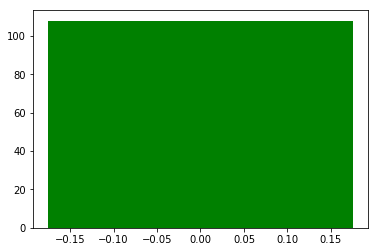

In [60]:
plt.bar(cu, cnt, width =0.35, color='g')
plt.show()